In [18]:
!git clone https://github.com/davidbau/gpwidget -b demo gpwidget 2>> install.log
import sys
sys.path.append('/content/gpwidget')

Downloading: "http://gandissect.csail.mit.edu/models/proggan_kitchen-67f1e16c.pth" to /root/.cache/torch/checkpoints/proggan_kitchen-67f1e16c.pth



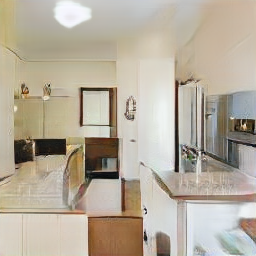

In [21]:
from ganpaint import nethook, setting, renormalize, zdataset, paintwidget

# Load a generator, and paint random image number 20 in a widget.
G = nethook.InstrumentedModel(setting.load_proggan('kitchen')).cuda()
z = zdataset.z_sample_for_model(G)[20][None].cuda()
V = paintwidget.PaintWidget(image=renormalize.as_url(G(z)[0]))

# Whenever the widget changes, call "changed" to edit the layer and repaint
TREE_UNITS = [119, 125, 157, 195, 365, 374, 418, 426, 408, 3, 297, 322, 343]
def changed(c):
    if not V.mask: return
    a = renormalize.from_url(V.mask, target='pt', size=(8,8))[0]
    def editrule(x, imodel, **buffers):
        x[:,TREE_UNITS] += (a * 20.0).to(x.device)
        return x
    G.edit_layer('layer4', rule=editrule)
    V.mask, V.image = '', renormalize.as_url(G(z)[0])
V.on('mask', changed)

display(V)


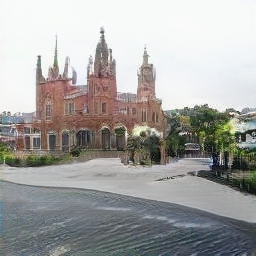

In [24]:
from ganpaint import nethook, setting, renormalize, zdataset, paintwidget

# Load a generator, and paint random image number 20 in a widget.
G = nethook.InstrumentedModel(setting.load_proggan('church')).cuda()
z = zdataset.z_sample_for_model(G)[20][None].cuda()
V = paintwidget.PaintWidget(image=renormalize.as_url(G(z)[0]))

# Whenever the widget changes, call "changed" to edit the layer and repaint
TREE_UNITS = [119, 125, 157, 195, 365, 374, 418, 426, 408, 3, 297, 322, 343]
def changed(c):
    if not V.mask: return
    a = renormalize.from_url(V.mask, target='pt', size=(8,8))[0]
    def editrule(x, imodel, **buffers):
        x[:,TREE_UNITS] += (a * 20.0).to(x.device)
        return x
    G.edit_layer('layer4', rule=editrule)
    V.mask, V.image = '', renormalize.as_url(G(z)[0])
V.on('mask', changed)

display(V)

Downloading: "http://gandissect.csail.mit.edu/models/proggan_conferenceroom-21e85882.pth" to /root/.cache/torch/checkpoints/proggan_conferenceroom-21e85882.pth



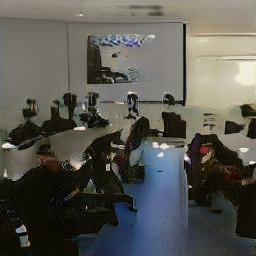

In [26]:
from ganpaint import nethook, setting, renormalize, zdataset, paintwidget

# Load a generator, and paint random image number 20 in a widget.
G = nethook.InstrumentedModel(setting.load_proggan('conferenceroom')).cuda()
z = zdataset.z_sample_for_model(G)[20][None].cuda()
V = paintwidget.PaintWidget(image=renormalize.as_url(G(z)[0]))

# Whenever the widget changes, call "changed" to edit the layer and repaint
TREE_UNITS = [119, 125, 157, 195, 365, 374, 418, 426, 408, 3, 297, 322, 343]
def changed(c):
    if not V.mask: return
    a = renormalize.from_url(V.mask, target='pt', size=(8,8))[0]
    def editrule(x, imodel, **buffers):
        x[:,TREE_UNITS] += (a * 20.0).to(x.device)
        return x
    G.edit_layer('layer4', rule=editrule)
    V.mask, V.image = '', renormalize.as_url(G(z)[0])
V.on('mask', changed)

display(V)

Downloading: "http://gandissect.csail.mit.edu/models/proggan_livingroom-5ef336dd.pth" to /root/.cache/torch/checkpoints/proggan_livingroom-5ef336dd.pth



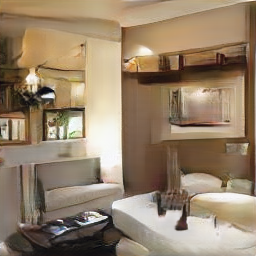

In [27]:
from ganpaint import nethook, setting, renormalize, zdataset, paintwidget

# Load a generator, and paint random image number 20 in a widget.
G = nethook.InstrumentedModel(setting.load_proggan('livingroom')).cuda()
z = zdataset.z_sample_for_model(G)[20][None].cuda()
V = paintwidget.PaintWidget(image=renormalize.as_url(G(z)[0]))

# Whenever the widget changes, call "changed" to edit the layer and repaint
TREE_UNITS = [119, 125, 157, 195, 365, 374, 418, 426, 408, 3, 297, 322, 343]
def changed(c):
    if not V.mask: return
    a = renormalize.from_url(V.mask, target='pt', size=(8,8))[0]
    def editrule(x, imodel, **buffers):
        x[:,TREE_UNITS] += (a * 20.0).to(x.device)
        return x
    G.edit_layer('layer4', rule=editrule)
    V.mask, V.image = '', renormalize.as_url(G(z)[0])
V.on('mask', changed)

display(V)

Downloading: "http://gandissect.csail.mit.edu/models/proggan_bedroom-d8a89ff1.pth" to /root/.cache/torch/checkpoints/proggan_bedroom-d8a89ff1.pth



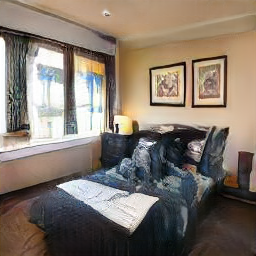

In [29]:
from ganpaint import nethook, setting, renormalize, zdataset, paintwidget

# Load a generator, and paint random image number 20 in a widget.
G = nethook.InstrumentedModel(setting.load_proggan('bedroom')).cuda()
z = zdataset.z_sample_for_model(G)[20][None].cuda()
V = paintwidget.PaintWidget(image=renormalize.as_url(G(z)[0]))

# Whenever the widget changes, call "changed" to edit the layer and repaint
TREE_UNITS = [119, 125, 157, 195, 365, 374, 418, 426, 408, 3, 297, 322, 343]
def changed(c):
    if not V.mask: return
    a = renormalize.from_url(V.mask, target='pt', size=(8,8))[0]
    def editrule(x, imodel, **buffers):
        x[:,TREE_UNITS] += (a * 20.0).to(x.device)
        return x
    G.edit_layer('layer4', rule=editrule)
    V.mask, V.image = '', renormalize.as_url(G(z)[0])
V.on('mask', changed)

display(V)

#Match Feature by Click

In [30]:
from ganpaint import renormalize, imgviz, nethook, pbar
import torch, torchvision
torch.backends.cudnn.benchmark = True
torch.set_grad_enabled(False)

In [31]:
net = nethook.InstrumentedModel(torchvision.models.resnet18(pretrained=True)).cuda()
net.eval()
net.layer_names()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


['',
 'conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1',
 'layer1.0',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.relu',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.1',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.relu',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer2',
 'layer2.0',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.relu',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.downsample',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.1',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.relu',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer3',
 'layer3.0',
 'layer3.0.conv1',
 'layer3.0.bn1',
 'layer3.0.relu',
 'layer3.0.conv2',
 'layer3.0.bn2',
 'layer3.0.downsample',
 'layer3.0.downsample.0',
 'layer3.0.downsample.1',
 'layer3.1',
 'layer3.1.conv1',
 'layer3.1.bn1',
 'layer3.1.relu',
 'layer3.1.conv2',
 'layer3.1.bn2',
 'layer4',
 'layer4.0',
 'layer4.0.conv1',
 'layer4.0.bn1',
 'layer4.0.relu',
 'layer4.0.conv2',
 'layer4.0.bn2',
 'layer4.0.downsample',
 'layer4.0.down

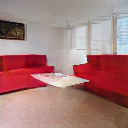

In [52]:
from ganpaint import parallelfolder
g_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(256),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

ds = parallelfolder.ParallelImageFolders(
    ['/content/gpwidget/testdata/livingroom/target_edits'],
    transform=g_transform,
    shuffle=True)

iv = imgviz.ImageVisualizer(128)
iv.image(ds[4][0])

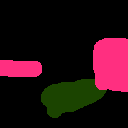

In [53]:

ds = parallelfolder.ParallelImageFolders(
    ['/content/gpwidget/testdata/kitchen/target_edits'],
    transform=g_transform,
    shuffle=True)

iv = imgviz.ImageVisualizer(128)
iv.image(ds[4][0])

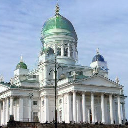

In [54]:

ds = parallelfolder.ParallelImageFolders(
    ['/content/gpwidget/testdata/church/target_edits'],
    transform=g_transform,
    shuffle=True)

iv = imgviz.ImageVisualizer(128)
iv.image(ds[4][0])

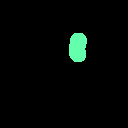

In [57]:
ds = parallelfolder.ParallelImageFolders(
    ['/content/gpwidget/testdata/bedroom/target_edits'],
    transform=g_transform,
    shuffle=True)

iv = imgviz.ImageVisualizer(128)
iv.image(ds[4][0])

#Gan Paint Widget

In [58]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [60]:
!cd gpwidget

In [62]:
from ganpaint.labwidget import Model, Property
from ganpaint.labwidget import Button, Textbox, Label, Range
from ganpaint import show
import html

prop = Property(30.5)


b = Range(prop)
t = Textbox(prop)
l = Label(t.prop('value'))
show([b, t, l])

In [64]:
from ganpaint import paintwidget
pw = paintwidget.PaintWidget(image='http://wednesday.csail.mit.edu/davidbau/encoder/results/image9-mask.png')
display(pw)

In [65]:
next(iter(dict(a=3)))

'a'

""
tree
""
""
""

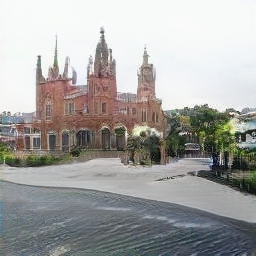

In [66]:
import torch
from ganpaint import nethook, setting, renormalize, zdataset, paintwidget, show
from ganpaint.labwidget import Button

# Load a generator, and paint random image number 20 in a widget.
G = nethook.InstrumentedModel(setting.load_proggan('church')).cuda()
z = zdataset.z_sample_for_model(G)[20][None].cuda()

# Whenever the widget changes, call "changed" to edit the layer and repaint

class GanPaintWidget(Model):
    def __init__(self, G, z, layer, concept_units):
        self.G = G
        self.z = z
        self.layer = layer
        self.canvas = paintwidget.PaintWidget(image=renormalize.as_url(G(z)[0]))
        self.concept_units = concept_units
        self.concept_masks = {}
        self.concept_tensors = {}
        self.reset = Button('reset')
        self.reset.on('click', self.do_reset)
        def setup_button(mode):
            button = Button(mode)
            def setmode():
                self.mode = mode
            button.on('click', setmode)
            setattr(self, mode, button)
        for i, k in enumerate(concept_units):
            setup_button(k)
        self.mode = Property(next(iter(concept_units)))
        def switch_mask(mode):
            self.canvas.mask = self.concept_masks.get(mode, '')
        self.on('mode', switch_mask)
        units = self.concept_units[self.mode]
        logging.debug('units are ' + repr(units))
        def editrule(x, imodel, **buffers):
            for k, a in self.concept_tensors.items():
                x[:,concept_units[k]] += (a * 20.0).to(x.device)
            return x
        self.G.edit_layer(layer, rule=editrule)
        self.canvas.on('mask', self.painted)
        
    def do_reset(self):
        self.concept_masks.clear()
        self.concept_tensors.clear()
        self.canvas.mask = ''
    
    def painted(self, mask):
        logging.debug('got painted call')
        self.concept_masks[self.mode] = mask
        if mask:
            self.concept_tensors[self.mode] = (
                renormalize.from_url(mask, target='pt', size=(8,8))[0])
        else:
            if self.mode in self.concept_tensors:
                del self.concept_tensors[self.mode]
        self.canvas.image = renormalize.as_url(self.G(self.z)[0])
        
    def _repr_html_(self):
        return show.html([(
            self.canvas,
            [(Label(self.prop('mode')),)] +
            [(getattr(self, k),) for k in self.concept_units]
            + [(self.reset,)]
        )])
    
gpw = GanPaintWidget(
    nethook.InstrumentedModel(setting.load_proggan('church')).cuda(),
    zdataset.z_sample_for_model(G)[20][None].cuda(),
    'layer4',
    dict(
        tree=[119, 125, 157, 195, 365, 374, 418, 426, 408, 3, 297, 322, 343],
        dome=[43, 419, 86, 370, 282, 233, 226, 430, 78, 402, 501]
    ))
show(gpw)

#ExploreVggByClick

In [67]:
from ganpaint import renormalize, imgviz, nethook, pbar
import torch, torchvision
torch.backends.cudnn.benchmark = True
torch.set_grad_enabled(False)

In [68]:
net = nethook.InstrumentedModel(torchvision.models.vgg16(pretrained=True)).cuda()
net.eval()
net.retain_layer('features.29')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [77]:
from ganpaint import parallelfolder
g_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(256),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

ds = parallelfolder.ParallelImageFolders(
    ['/content/gpwidget/testdata/church/target_edits'],
    transform=g_transform,
    shuffle=True)

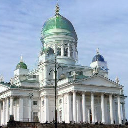

In [80]:
iv = imgviz.ImageVisualizer(128)
iv.image(ds[4][0])